In [2]:
# # Exploratory Data Analysis (EDA)
# 
# This notebook performs comprehensive analysis on the preprocessed financial data.

# %% [markdown]
# ## 1. Setup and Configuration

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from scipy.stats import norm, kurtosis, skew
import os
from pathlib import Path

# Configuration
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid", palette="husl")
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.4f}'.format)

# Create directories
os.makedirs('../reports/figures/eda', exist_ok=True)

# %% [markdown]
# ## 2. Load Processed Data

# %%
# Load individual ticker data
tickers = ['TSLA', 'BND', 'SPY']
processed_data = {}

for ticker in tickers:
    file_path = f'../data/processed/{ticker}_cleaned.csv'
    try:
        df = pd.read_csv(file_path, parse_dates=['Date'])
        processed_data[ticker] = df
        print(f"✅ Loaded {ticker} with {len(df)} rows")
    except Exception as e:
        print(f"❌ Error loading {ticker}: {str(e)}")

# Load combined data
combined_df = pd.read_csv('../data/processed/combined_cleaned.csv', parse_dates=['Date'])
print("\n✅ Loaded combined dataset with shape:", combined_df.shape)

✅ Loaded TSLA with 2535 rows
✅ Loaded BND with 2535 rows
✅ Loaded SPY with 2535 rows

✅ Loaded combined dataset with shape: (7605, 19)


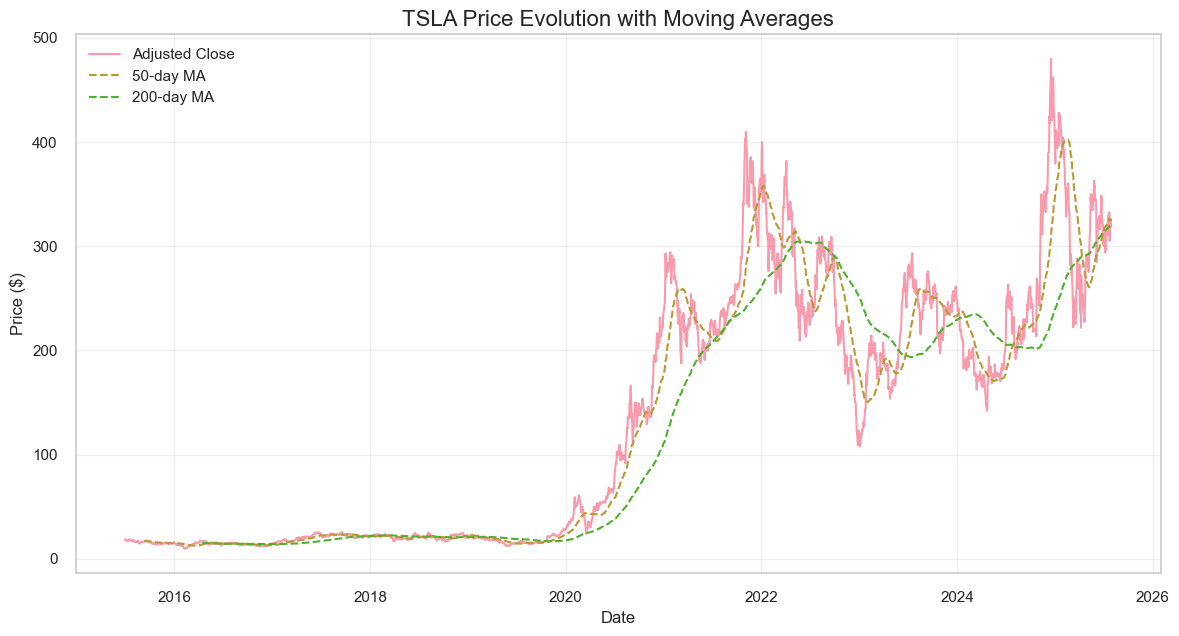

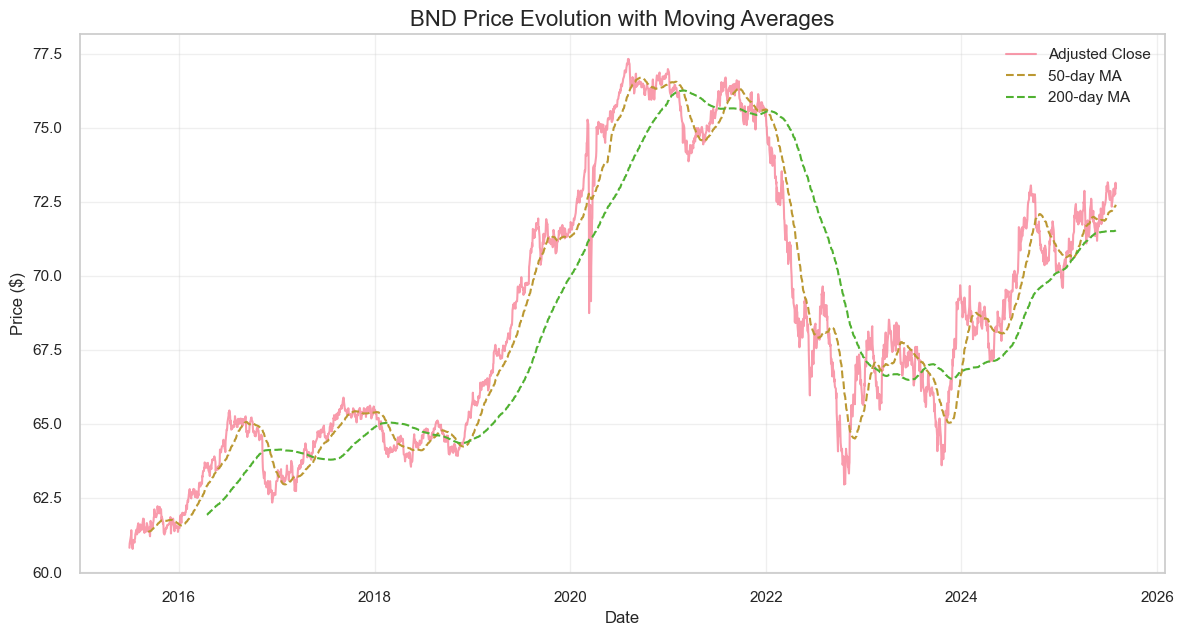

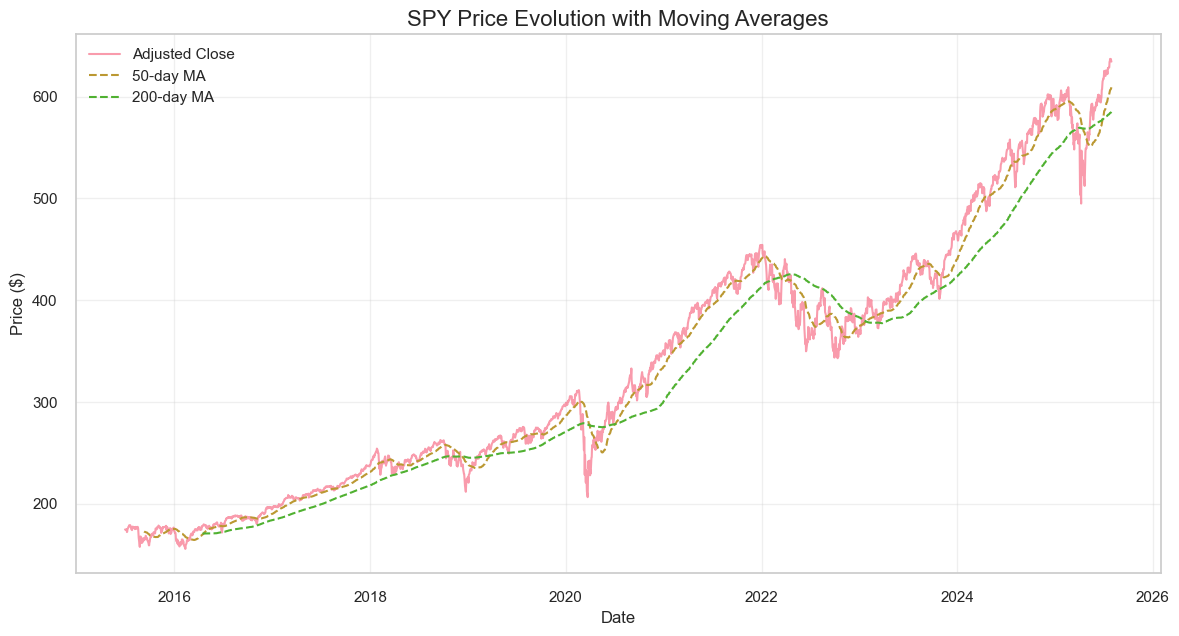

In [3]:
# ## 3. Time Series Analysis

# %%
def plot_price_evolution(ticker, df):
    """Plot price evolution with moving averages"""
    plt.figure(figsize=(14, 7))
    
    # Price and moving averages
    plt.plot(df['Date'], df['Adj Close'], label='Adjusted Close', alpha=0.7)
    plt.plot(df['Date'], df['MA_50d'], label='50-day MA', linestyle='--')
    plt.plot(df['Date'], df['MA_200d'], label='200-day MA', linestyle='--')
    
    plt.title(f'{ticker} Price Evolution with Moving Averages', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price ($)', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Save and show
    plt.savefig(f'../reports/figures/eda/{ticker}_price_evolution.png', dpi=300, bbox_inches='tight')
    plt.show()

# Plot for each ticker
for ticker, df in processed_data.items():
    plot_price_evolution(ticker, df)

# %% [markdown]

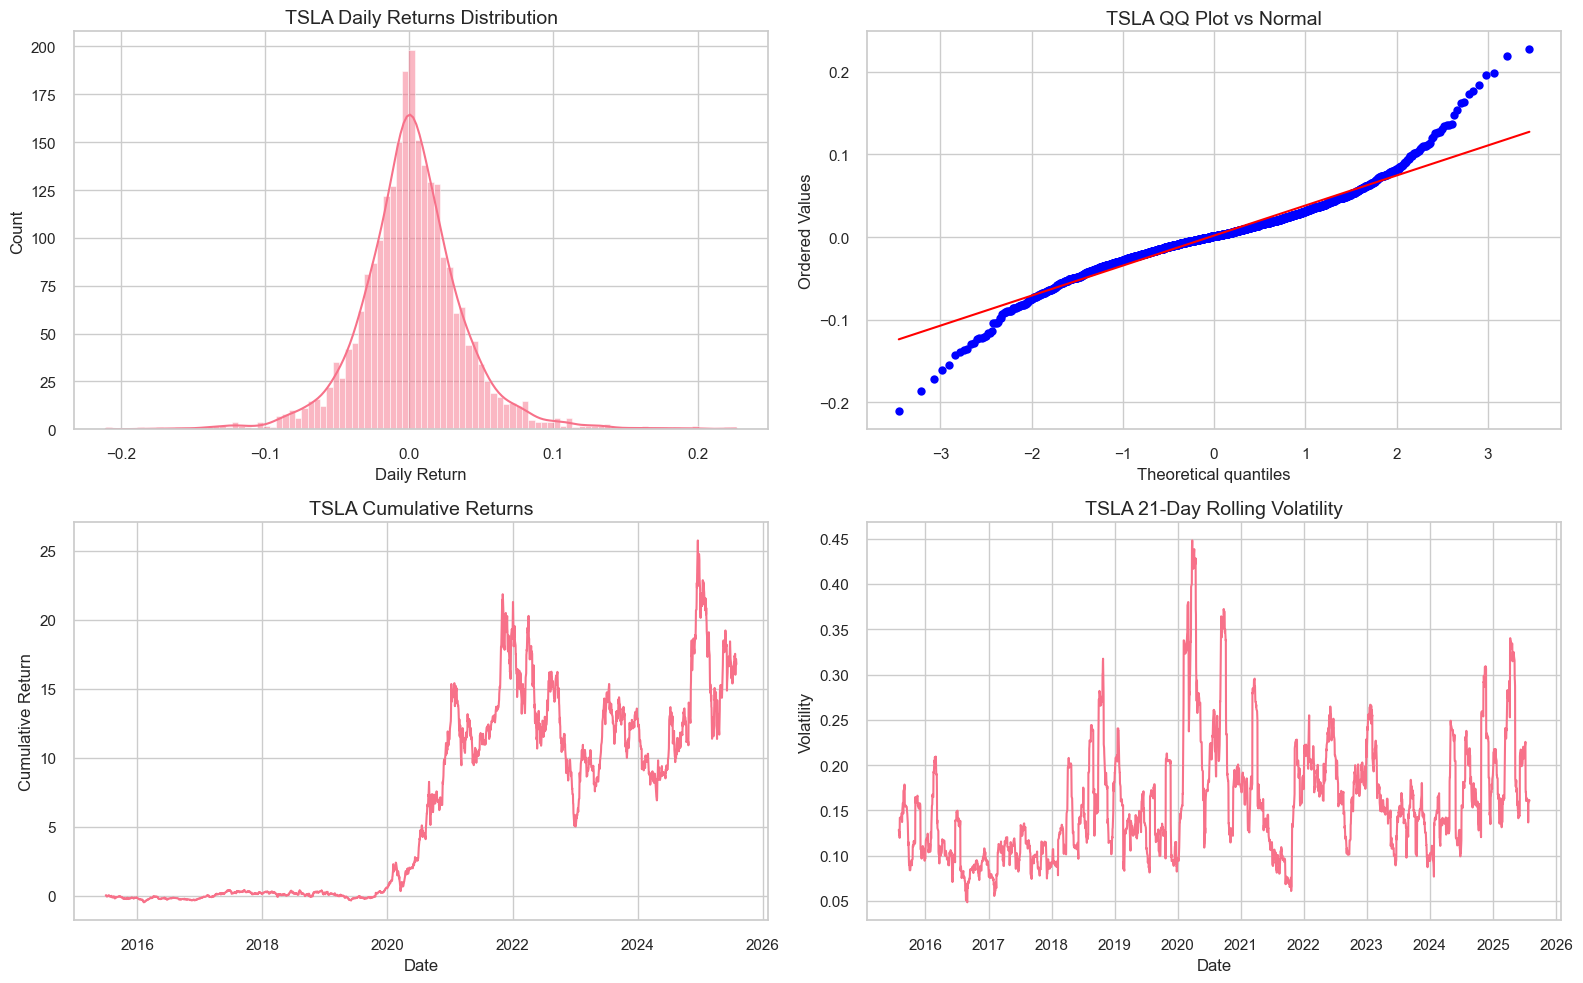


📊 TSLA Return Statistics:
Mean: 0.001828
Std Dev: 0.037285
Skewness: 0.2947
Kurtosis: 4.3038
Max: 0.2269
Min: -0.2106



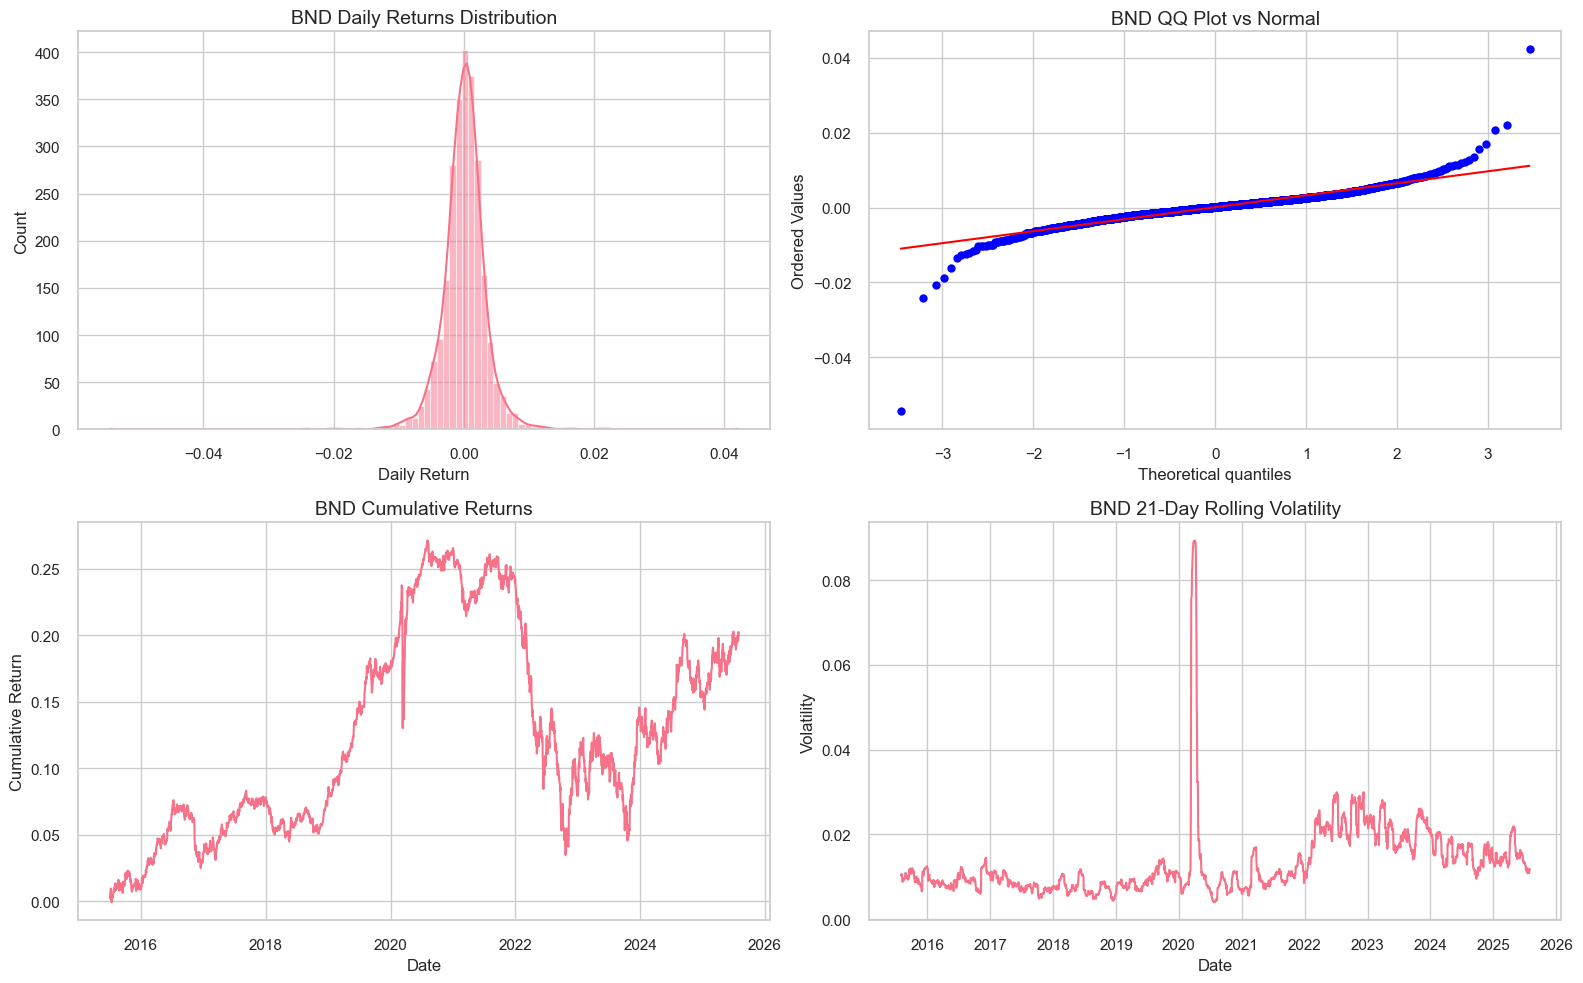


📊 BND Return Statistics:
Mean: 0.000078
Std Dev: 0.003460
Skewness: -0.9442
Kurtosis: 36.2595
Max: 0.0422
Min: -0.0544



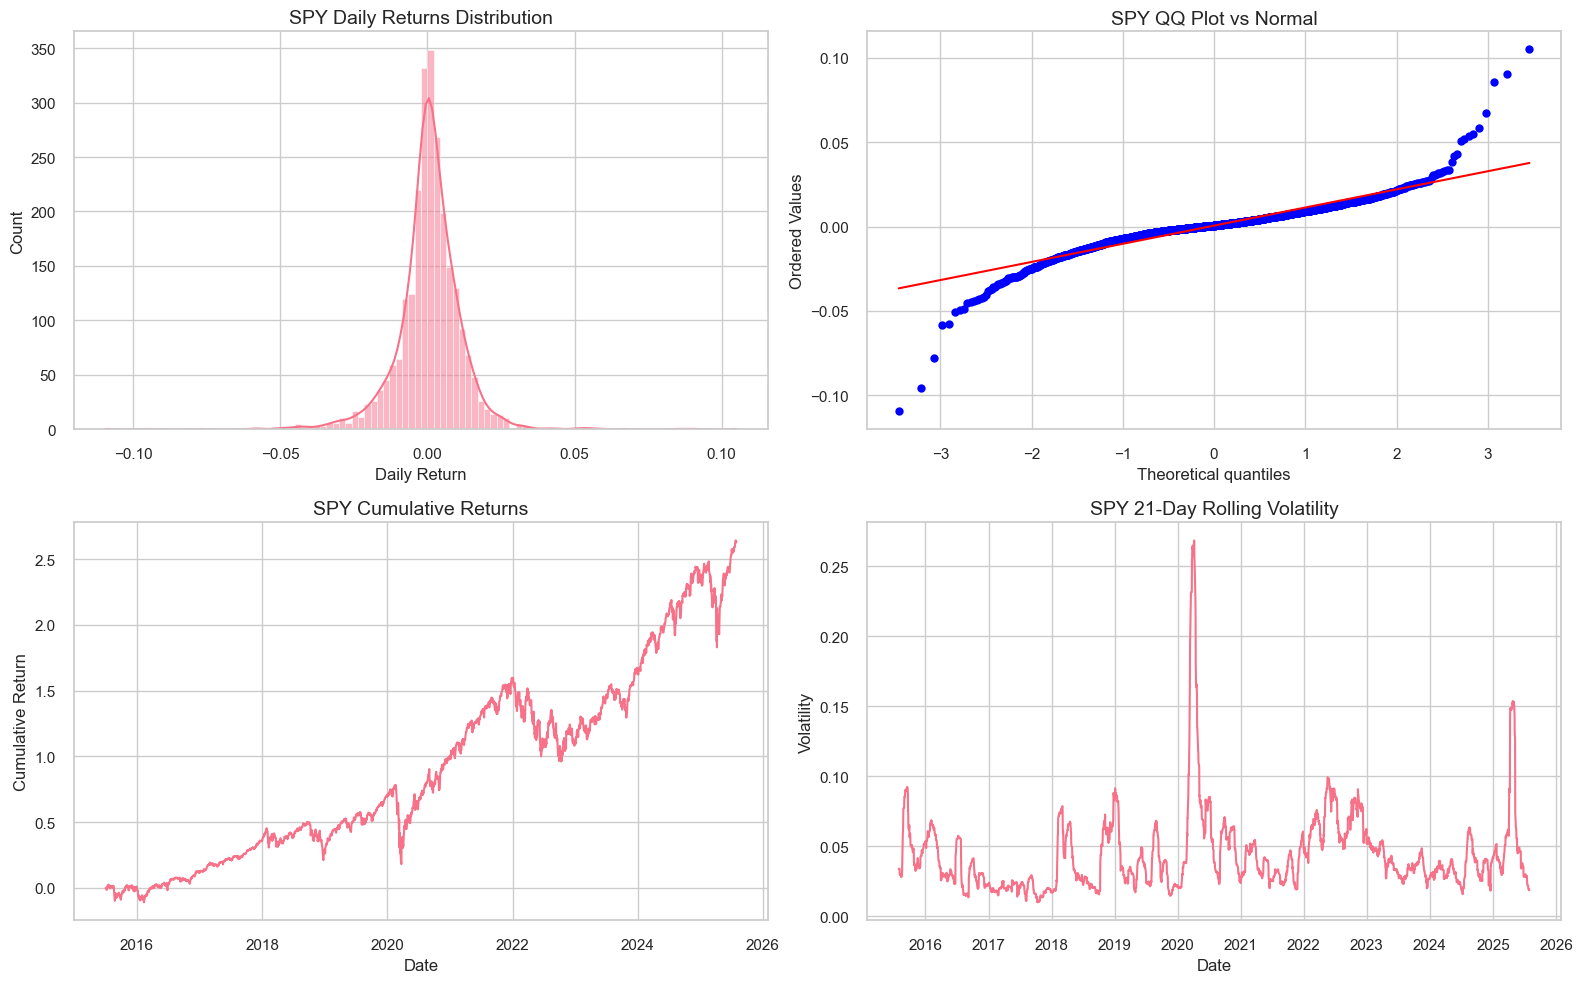


📊 SPY Return Statistics:
Mean: 0.000575
Std Dev: 0.011491
Skewness: -0.3092
Kurtosis: 13.8740
Max: 0.1050
Min: -0.1094


In [5]:
# %% [markdown]
# ## 4. Return Analysis

# %%
from scipy import stats  # Add this import at the top of your imports section

def analyze_returns(ticker, df):
    """Analyze and visualize return characteristics"""
    plt.figure(figsize=(16, 10))
    
    # Daily returns distribution
    plt.subplot(2, 2, 1)
    sns.histplot(df['Daily_Return'].dropna(), kde=True, bins=100)
    plt.title(f'{ticker} Daily Returns Distribution', fontsize=14)
    plt.xlabel('Daily Return')
    
    # QQ plot
    plt.subplot(2, 2, 2)
    stats.probplot(df['Daily_Return'].dropna(), dist="norm", plot=plt)
    plt.title(f'{ticker} QQ Plot vs Normal', fontsize=14)
    
    # Cumulative returns
    plt.subplot(2, 2, 3)
    cumulative_returns = (1 + df['Daily_Return']).cumprod() - 1
    plt.plot(df['Date'], cumulative_returns)
    plt.title(f'{ticker} Cumulative Returns', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    
    # Volatility
    plt.subplot(2, 2, 4)
    plt.plot(df['Date'], df['Volatility_21d'])
    plt.title(f'{ticker} 21-Day Rolling Volatility', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    
    plt.tight_layout()
    plt.savefig(f'../reports/figures/eda/{ticker}_returns_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Return statistics
    returns = df['Daily_Return'].dropna()
    print(f"\n📊 {ticker} Return Statistics:")
    print(f"Mean: {returns.mean():.6f}")
    print(f"Std Dev: {returns.std():.6f}")
    print(f"Skewness: {skew(returns):.4f}")
    print(f"Kurtosis: {kurtosis(returns):.4f}")
    print(f"Max: {returns.max():.4f}")
    print(f"Min: {returns.min():.4f}")

# Analyze returns for each ticker
for ticker, df in processed_data.items():
    print(f"\n{'='*50}")
    analyze_returns(ticker, df)

In [6]:
# ## 5. Stationarity Testing

# %%
def test_stationarity(series, title):
    """Perform ADF test for stationarity"""
    print(f'\n🔍 Stationarity Test for {title}')
    result = adfuller(series.dropna())
    
    print('ADF Statistic: %.4f' % result[0])
    print('p-value: %.4f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value:.4f}')
    
    if result[1] < 0.05:
        print("✅ Series is stationary")
    else:
        print("❌ Series is non-stationary")

# Test stationarity for price and returns
for ticker, df in processed_data.items():
    print(f"\n{'='*50}")
    print(f"📈 {ticker} Stationarity Analysis")
    test_stationarity(df['Adj Close'], f"{ticker} Price")
    test_stationarity(df['Daily_Return'], f"{ticker} Daily Returns")

# %% [markdown]


📈 TSLA Stationarity Analysis

🔍 Stationarity Test for TSLA Price
ADF Statistic: -1.4189
p-value: 0.5732
Critical Values:
   1%: -3.4330
   5%: -2.8627
   10%: -2.5674
❌ Series is non-stationary

🔍 Stationarity Test for TSLA Daily Returns
ADF Statistic: -34.6811
p-value: 0.0000
Critical Values:
   1%: -3.4329
   5%: -2.8627
   10%: -2.5674
✅ Series is stationary

📈 BND Stationarity Analysis

🔍 Stationarity Test for BND Price
ADF Statistic: -1.5362
p-value: 0.5155
Critical Values:
   1%: -3.4329
   5%: -2.8627
   10%: -2.5674
❌ Series is non-stationary

🔍 Stationarity Test for BND Daily Returns
ADF Statistic: -9.8898
p-value: 0.0000
Critical Values:
   1%: -3.4330
   5%: -2.8627
   10%: -2.5674
✅ Series is stationary

📈 SPY Stationarity Analysis

🔍 Stationarity Test for SPY Price
ADF Statistic: 0.6908
p-value: 0.9897
Critical Values:
   1%: -3.4329
   5%: -2.8627
   10%: -2.5674
❌ Series is non-stationary

🔍 Stationarity Test for SPY Daily Returns
ADF Statistic: -16.2644
p-value: 0.0000

In [7]:
# ## 6. Risk Analysis

# %%
def calculate_risk_metrics(returns, confidence_level=0.05):
    """Calculate various risk metrics"""
    # Historical VaR
    var_hist = np.percentile(returns, confidence_level * 100)
    
    # Parametric VaR (assuming normal distribution)
    var_param = norm.ppf(confidence_level, returns.mean(), returns.std())
    
    # Expected Shortfall (CVaR)
    cvar = returns[returns <= var_hist].mean()
    
    # Sharpe Ratio (assuming risk-free rate = 0)
    sharpe = returns.mean() / returns.std() * np.sqrt(252)
    
    return {
        'Historical VaR (95%)': var_hist,
        'Parametric VaR (95%)': var_param,
        'CVaR (95%)': cvar,
        'Sharpe Ratio': sharpe
    }

# Calculate and display risk metrics
risk_metrics = {}
for ticker, df in processed_data.items():
    returns = df['Daily_Return'].dropna()
    risk_metrics[ticker] = calculate_risk_metrics(returns)
    
    print(f"\n📉 {ticker} Risk Metrics:")
    for metric, value in risk_metrics[ticker].items():
        print(f"{metric}: {value:.6f}")

# Create risk metrics dataframe
risk_df = pd.DataFrame(risk_metrics).T
risk_df.to_csv('../reports/risk_metrics.csv')
print("\n💾 Saved risk metrics to ../reports/risk_metrics.csv")

# %% [markdown]


📉 TSLA Risk Metrics:
Historical VaR (95%): -0.054663
Parametric VaR (95%): -0.059501
CVaR (95%): -0.081962
Sharpe Ratio: 0.778340

📉 BND Risk Metrics:
Historical VaR (95%): -0.004900
Parametric VaR (95%): -0.005613
CVaR (95%): -0.007734
Sharpe Ratio: 0.356879

📉 SPY Risk Metrics:
Historical VaR (95%): -0.017195
Parametric VaR (95%): -0.018326
CVaR (95%): -0.028010
Sharpe Ratio: 0.794072

💾 Saved risk metrics to ../reports/risk_metrics.csv



📅 TSLA Seasonality Analysis


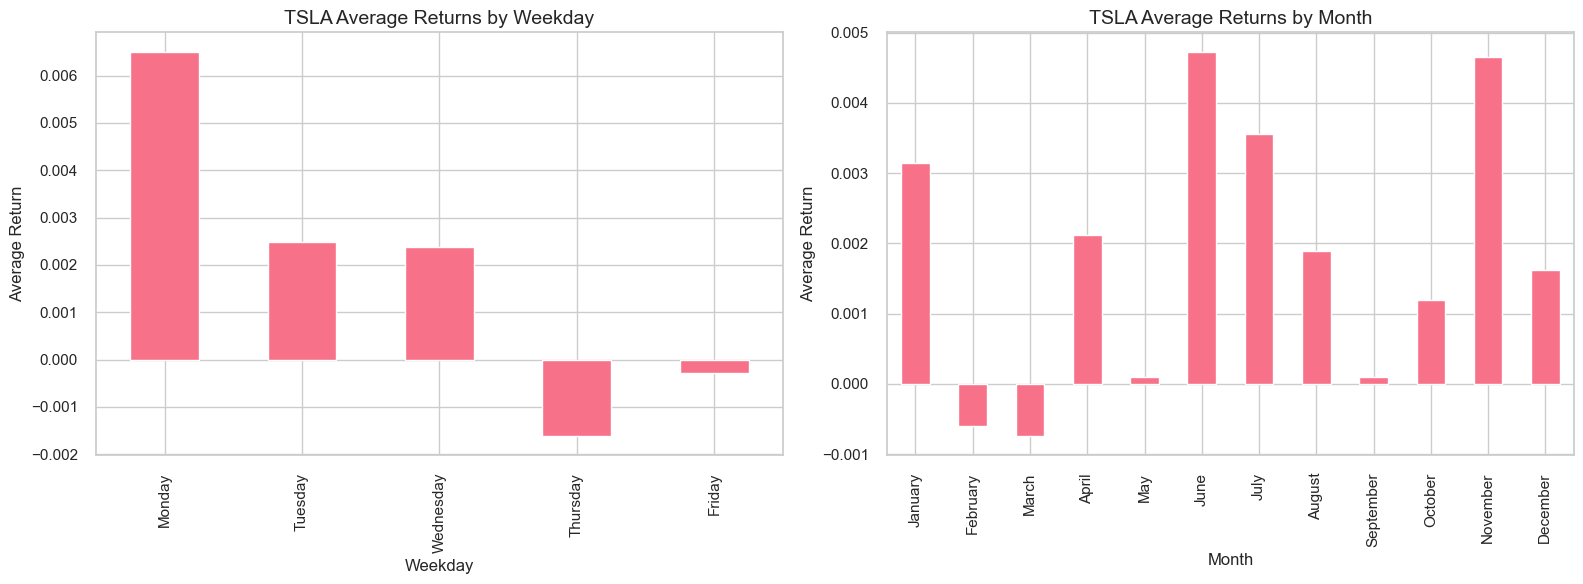


📅 BND Seasonality Analysis


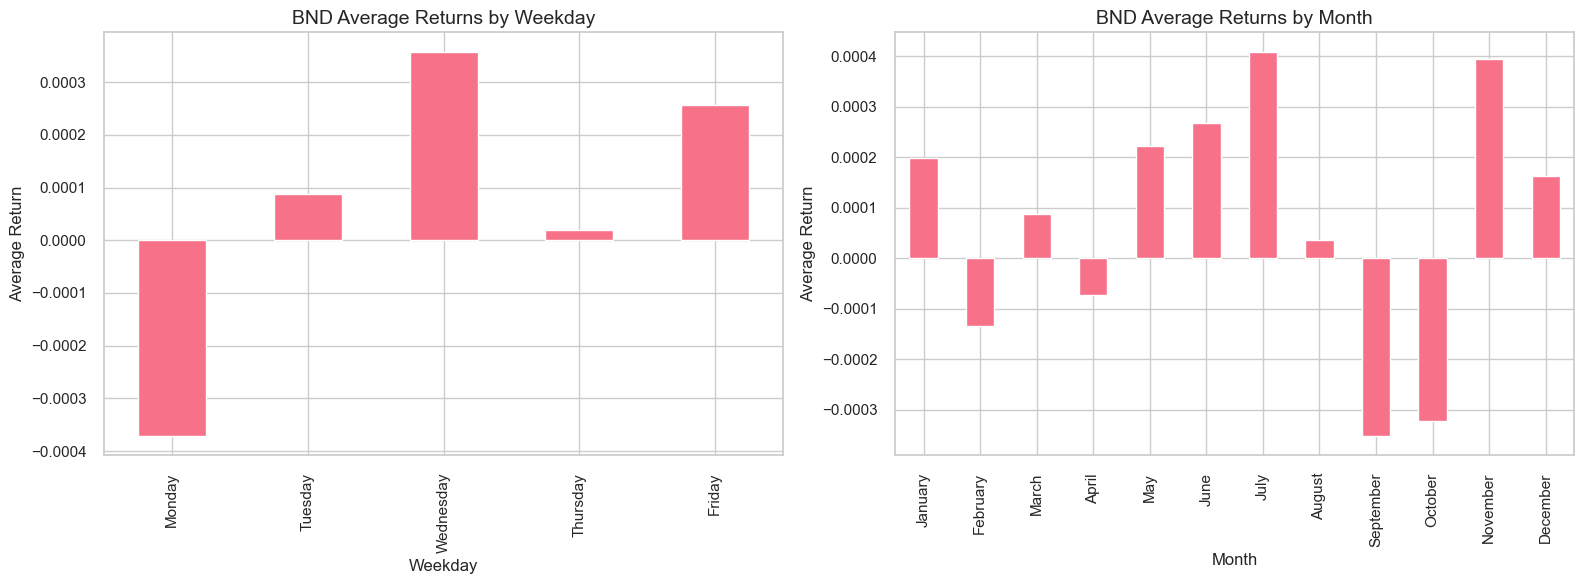


📅 SPY Seasonality Analysis


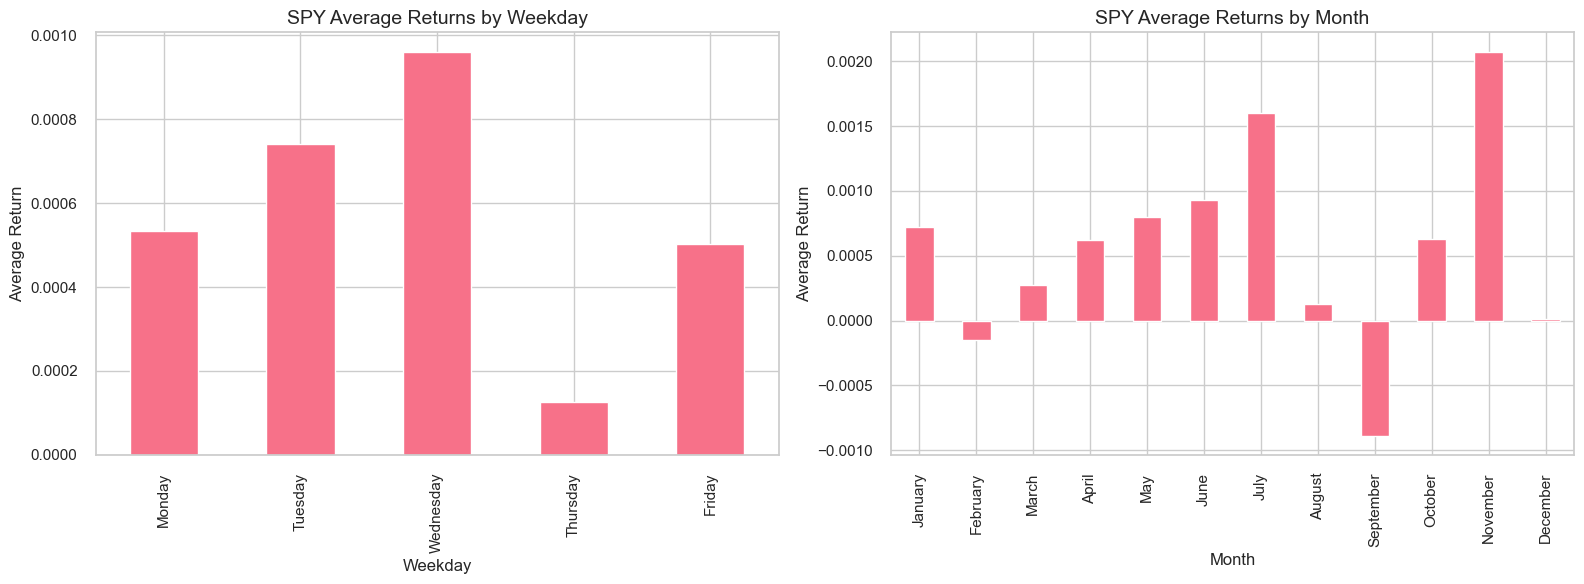

In [8]:
# ## 7. Seasonality Analysis

# %%
def analyze_seasonality(ticker, df):
    """Analyze weekly and monthly seasonality"""
    plt.figure(figsize=(16, 6))
    
    # Weekly seasonality
    plt.subplot(1, 2, 1)
    weekly_returns = df.groupby('Weekday')['Daily_Return'].mean()
    weekly_returns = weekly_returns.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
    weekly_returns.plot(kind='bar')
    plt.title(f'{ticker} Average Returns by Weekday', fontsize=14)
    plt.xlabel('Weekday')
    plt.ylabel('Average Return')
    
    # Monthly seasonality
    plt.subplot(1, 2, 2)
    monthly_returns = df.groupby('Month')['Daily_Return'].mean()
    months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    monthly_returns = monthly_returns.reindex(months_order)
    monthly_returns.plot(kind='bar')
    plt.title(f'{ticker} Average Returns by Month', fontsize=14)
    plt.xlabel('Month')
    plt.ylabel('Average Return')
    
    plt.tight_layout()
    plt.savefig(f'../reports/figures/eda/{ticker}_seasonality.png', dpi=300, bbox_inches='tight')
    plt.show()

# Analyze seasonality for each ticker
for ticker, df in processed_data.items():
    print(f"\n{'='*50}")
    print(f"📅 {ticker} Seasonality Analysis")
    analyze_seasonality(ticker, df)

# %% [markdown]

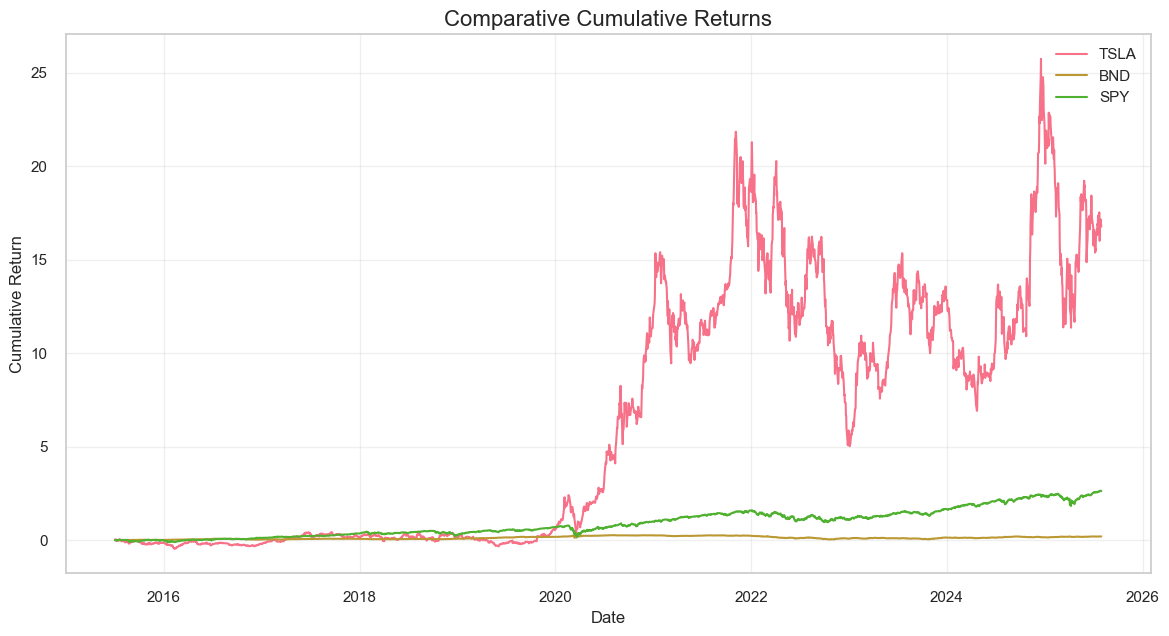

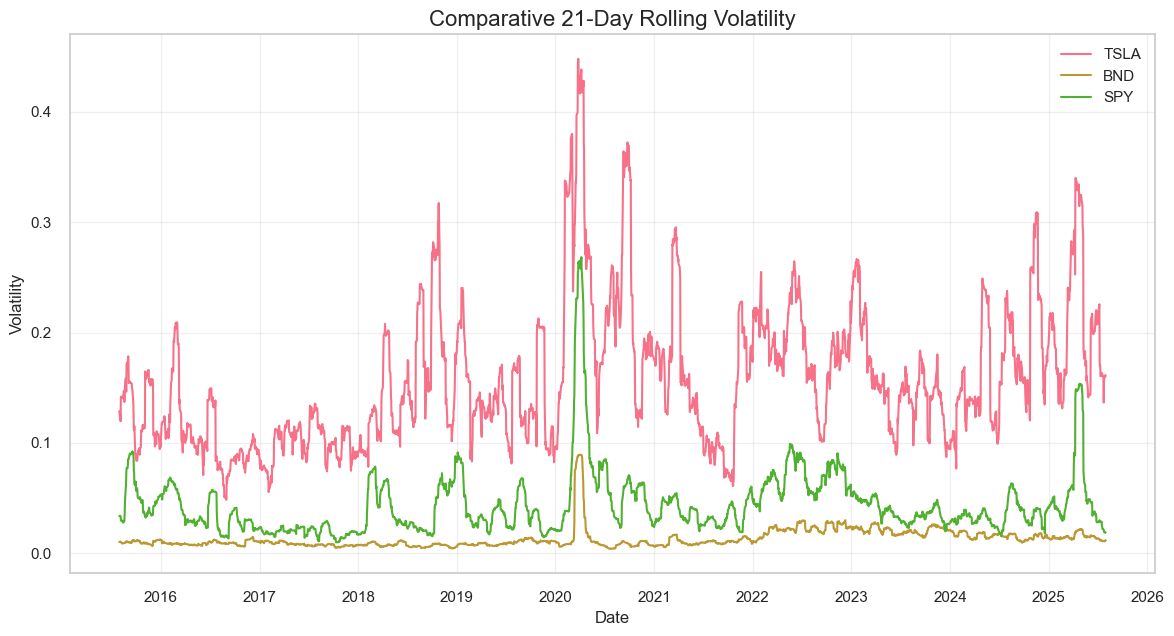

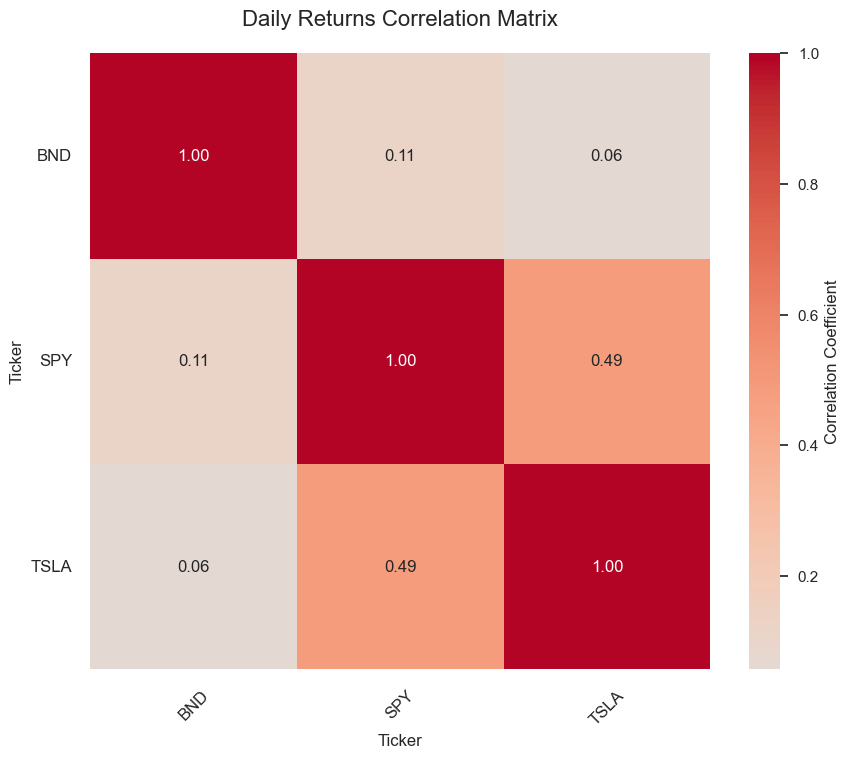

In [9]:
# ## 8. Comparative Analysis

# %%
# Comparative cumulative returns
plt.figure(figsize=(14, 7))
for ticker, df in processed_data.items():
    cum_returns = (1 + df['Daily_Return']).cumprod() - 1
    plt.plot(df['Date'], cum_returns, label=ticker)

plt.title('Comparative Cumulative Returns', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('../reports/figures/eda/comparative_cumulative_returns.png', dpi=300, bbox_inches='tight')
plt.show()

# Comparative volatility
plt.figure(figsize=(14, 7))
for ticker, df in processed_data.items():
    plt.plot(df['Date'], df['Volatility_21d'], label=ticker)

plt.title('Comparative 21-Day Rolling Volatility', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('../reports/figures/eda/comparative_volatility.png', dpi=300, bbox_inches='tight')
plt.show()

# %% [markdown]
# ## 9. Correlation Analysis

# %%
# Create pivot table of adjusted closes
pivot_prices = combined_df.pivot(index='Date', columns='Ticker', values='Adj Close')

# Calculate correlations
corr_matrix = pivot_prices.pct_change().corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            annot_kws={"size": 12}, fmt='.2f',
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Daily Returns Correlation Matrix', fontsize=16, pad=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.savefig('../reports/figures/eda/returns_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

# %% [markdown]


📊 Portfolio Performance Metrics:
      Annualized Return  Annualized Volatility  Sharpe Ratio
TSLA             0.5845                 0.5919        0.7783
BND              0.0198                 0.0549        0.3569
SPY              0.1558                 0.1824        0.7941


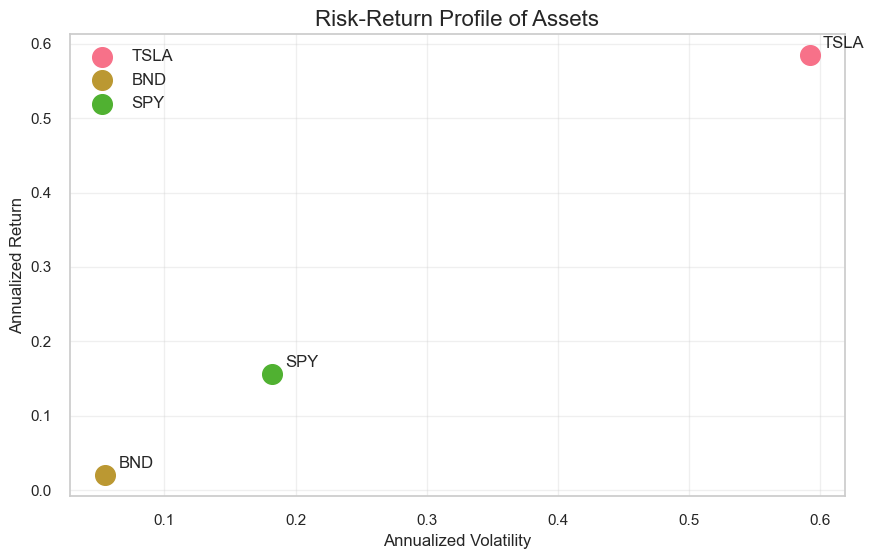

In [10]:
# ## 10. Portfolio Analysis

# %%
# Calculate annualized metrics
portfolio_metrics = {}
for ticker in tickers:
    returns = processed_data[ticker]['Daily_Return'].dropna()
    portfolio_metrics[ticker] = {
        'Annualized Return': (1 + returns.mean())**252 - 1,
        'Annualized Volatility': returns.std() * np.sqrt(252),
        'Sharpe Ratio': returns.mean() / returns.std() * np.sqrt(252)
    }

portfolio_df = pd.DataFrame(portfolio_metrics).T
print("\n📊 Portfolio Performance Metrics:")
print(portfolio_df)

# Plot risk-return profile
plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.scatter(portfolio_df.loc[ticker, 'Annualized Volatility'],
                portfolio_df.loc[ticker, 'Annualized Return'],
                s=200, label=ticker)
    
plt.title('Risk-Return Profile of Assets', fontsize=16)
plt.xlabel('Annualized Volatility', fontsize=12)
plt.ylabel('Annualized Return', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Add annotations
for ticker in tickers:
    plt.annotate(ticker, 
                (portfolio_df.loc[ticker, 'Annualized Volatility'] + 0.01,
                 portfolio_df.loc[ticker, 'Annualized Return'] + 0.01),
                fontsize=12)

plt.savefig('../reports/figures/eda/risk_return_profile.png', dpi=300, bbox_inches='tight')
plt.show()

# %% [markdown]

In [11]:
# ## 11. Save Key Insights

# %%
# Generate and save insights
insights = {
    'data_period': {
        'start': combined_df['Date'].min().strftime('%Y-%m-%d'),
        'end': combined_df['Date'].max().strftime('%Y-%m-%d')
    },
    'assets_analyzed': tickers,
    'key_observations': {
        'highest_return_asset': portfolio_df['Annualized Return'].idxmax(),
        'lowest_volatility_asset': portfolio_df['Annualized Volatility'].idxmin(),
        'best_sharpe_ratio': portfolio_df['Sharpe Ratio'].idxmax(),
        'most_volatile_asset': portfolio_df['Annualized Volatility'].idxmax()
    },
    'correlation_analysis': {
        'highest_correlation': f"{corr_matrix.unstack().sort_values(ascending=False).index[1]}",
        'lowest_correlation': f"{corr_matrix.unstack().sort_values().index[0]}"
    }
}

# Save insights as JSON
import json
with open('../reports/eda_insights.json', 'w') as f:
    json.dump(insights, f, indent=2)

print("\n💾 Saved insights to ../reports/eda_insights.json")
print("\n✅ EDA Complete! All visualizations and reports generated.")


💾 Saved insights to ../reports/eda_insights.json

✅ EDA Complete! All visualizations and reports generated.
